# Bayesian inference

<style>
.MathJax {
  font-family: "Common HTML";
}
</style>

$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
\newcommand{\loss}{\ell}
\newcommand{\eloss}{\mc{L}}
\newcommand{\abs}[1]{| #1 |}
\newcommand{\norm}[1]{\| #1 \|}
\newcommand{\tp}{T}
$$


__<div style="text-align: right"> ASE3001: Computational Experiments for Aerospace Engineering, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_

<br>

___

<br>

Bayesian inference is a method of statistical inference in which Bayes' theorem is used to update the probability for a hypothesis as more evidence or information becomes available. Bayesian inference is an important technique in statistics, and especially in mathematical statistics. Bayesian updating is particularly important in the dynamic analysis of a sequence of data. Bayesian inference has found application in a wide range of activities, including science, engineering, philosophy, medicine, sport, and law. In the philosophy of decision theory, Bayesian inference is closely related to subjective probability, often called "Bayesian probability".

Bayesian inference derives the posterior probability as a consequence of two antecedents: a prior probability and a "likelihood function" derived from a statistical model for the observed data. Bayesian inference computes the posterior probability according to Bayes' theorem:

$$
P(H \mid E)={\frac {P(E\mid H)\cdot P(H)}{P(E)}}
$$
where
- $H$ stands for any hypothesis whose probability may be affected by data (called evidence below). Often there are competing hypotheses, and the task is to determine which is the most probable.

- $P(H)$, the prior probability, is the estimate of the probability of the hypothesis $H$ before the data $E$, the current evidence, is observed.

- $E$, the evidence, corresponds to new data that were not used in computing the prior probability.

- $P(H\mid E)$, the posterior probability, is the probability of $H$ given $E$, i.e., after $E$ is observed. This is what we want to know: the probability of a hypothesis given the observed evidence.

- $P(E\mid H)$ is the probability of observing $E$ given $H$, and is called the likelihood. As a function of $E$ with $H$ fixed, it indicates the compatibility of the evidence with the given hypothesis. The likelihood function is a function of the evidence, $E$, while the posterior probability is a function of the hypothesis, $H$.

- $P(E)$ is sometimes termed the marginal likelihood or "model evidence". This factor is the same for all possible hypotheses being considered (as is evident from the fact that the hypothesis
$H$ does not appear anywhere in the symbol, unlike for all the other factors), so this factor does not enter into determining the relative probabilities of different hypotheses.

<br>

For different values of $H$, only the factors $P(H)$ and $P(E\mid H)$, both in the numerator, affect the value of $P(H\mid E)$ – the posterior probability of a hypothesis is proportional to its prior probability (its inherent likeliness) and the newly acquired likelihood (its compatibility with the new observed evidence).

<br>

Bayes' rule can also be written as follows:

$$
P(H\mid E)={\frac {P(E\mid H)}{P(E)}}\cdot P(H)
$$

where the factor ${{P(E\mid H)}/{P(E)}}$ can be interpreted as the impact of $E$ on the probability of $H$.

<br>

___

<br>

## Medical test

We take a textbook toy example. In this problem we are going to calculate the probability that a patient has an illness given a positive test-result for the illness. A positive test result means the test thinks the patient has the illness.

We have the following prior knowledge on the illness and the test.

- Statistically 8% of the population has the illness.
- The test is quite reliable that the test returns a positive result 95% of the time for patients who have the illness, so 95% of true positive rate.
- The test resturns a positive result 7% of the time for people who do not have the illness, so 7% of false alarm rate.

Now suppose you randomly picked someone from the population for the test, and the test returned a positive result. What is the probability that this person has the illness?


Let us define the following notations.

- $H$: the event that the patient has the illness
- $E$: the event that the test result is positive
- $P(H)$: the probability of the patient having the illness
- $P(E)$: the probability of the test result being positive
- $P(E\mid H)$: the probability of a positive result when the patient has the illness
- $P(E\mid H^C)$: the probability of a positive result when the patient does not have the illness

Then for this problem we know that

\begin{align*}
  P(H) &= 0.08 \\
  P(E \mid H) &= 0.95 \\
  P(E\mid H^C) &= 0.07
\end{align*}

Additionally,
\begin{align*}
  P(H^C) &= 0.92 \\
  P(E^C\mid H) &= 1-P(E\mid H) =  0.05 \\
  P(E^C\mid H^C) &= 1-P(E\mid H^C) = 0.93
\end{align*}

In this problem we are interested in the probability of a person having the illness when the test result is positive, so we want to compute $P(H\mid E)$ from the above information.


<br>

From the Bayes' theorem, we know

\begin{align*}
  P(H\mid E) &= \frac{P(E\mid H)P(H)}{P(E)} \\
  &= \frac{P(E\mid H)P(H)}{P(E\mid H)P(H)+P(E\mid H^C)P(H^C)}   
\end{align*}

In [1]:
Prob_H = 0.08
Prob_E_given_H = 0.95
Prob_E_given_Hc = 0.07

Prob_Hc = 1 - Prob_H
Prob_E = Prob_E_given_H * Prob_H + Prob_E_given_Hc * Prob_Hc

Prob_H_given_E = Prob_E_given_H * Prob_H / Prob_E

print(Prob_H_given_E)

0.5413105413105412


<br>

The chart below provides the intuition behind this.

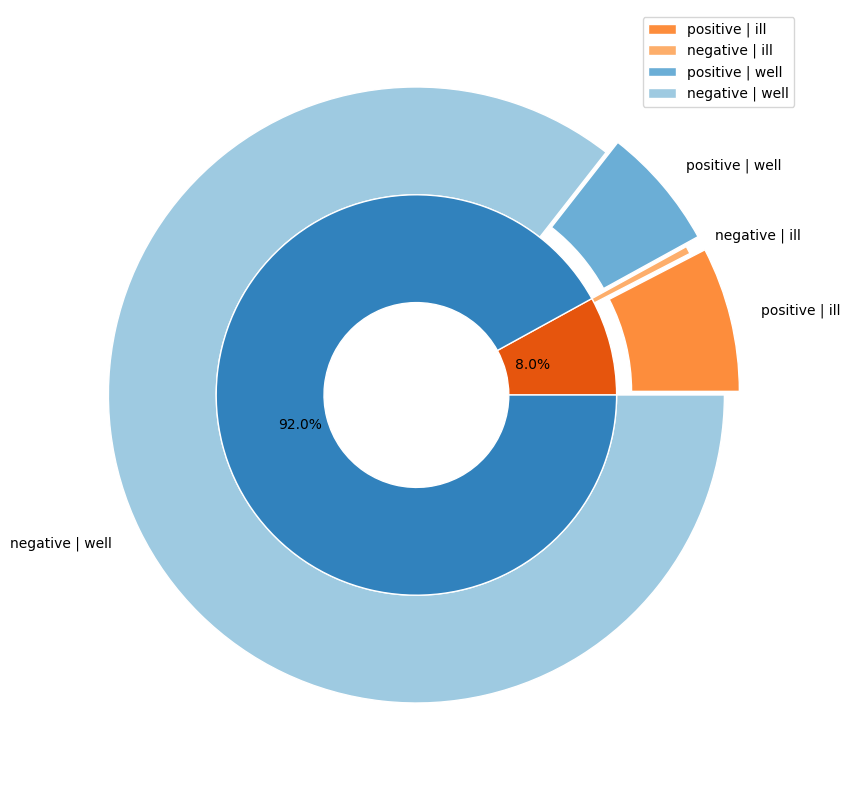

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
size = 0.35

inner_vals = np.array([Prob_H, 1-Prob_H])
vals1 = np.array([Prob_E_given_H, 1-Prob_E_given_H])*Prob_H
vals2 = np.array([Prob_E_given_Hc, 1-Prob_E_given_Hc])*Prob_Hc
outer_vals = np.hstack((vals1, vals2))

cmap = plt.get_cmap("tab20c")
inner_colors = cmap([4, 0])
outer_colors = cmap([5, 6, 1, 2])

outer_labels = 'positive | ill', 'negative | ill', \
'positive | well', 'negative | well'
plt.pie(outer_vals, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=outer_labels,
       explode=(0.05, 0, 0.05, 0))
plt.legend()
inner_labels = r'$H$', r'$H^c$'
plt.pie(inner_vals, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.1f%%' )
plt.show()

## Gaussian density function

Suppose we are given a two dimensional random vector $x=(x_1, x_2)\in\mathbb{R}^2$,  
and it follows the Gaussian density function with zero mean and covariance of

$$
\begin{aligned}
  \bar{x} &= \mathbf{E}[x] = 
  \begin{bmatrix}
  0 \\
  0
  \end{bmatrix} \\
  \Sigma &= \mathbf{cov}[x] =
  \begin{bmatrix}
  2 & 0.8 \\
  0.8 & 1
  \end{bmatrix}
\end{aligned}
$$


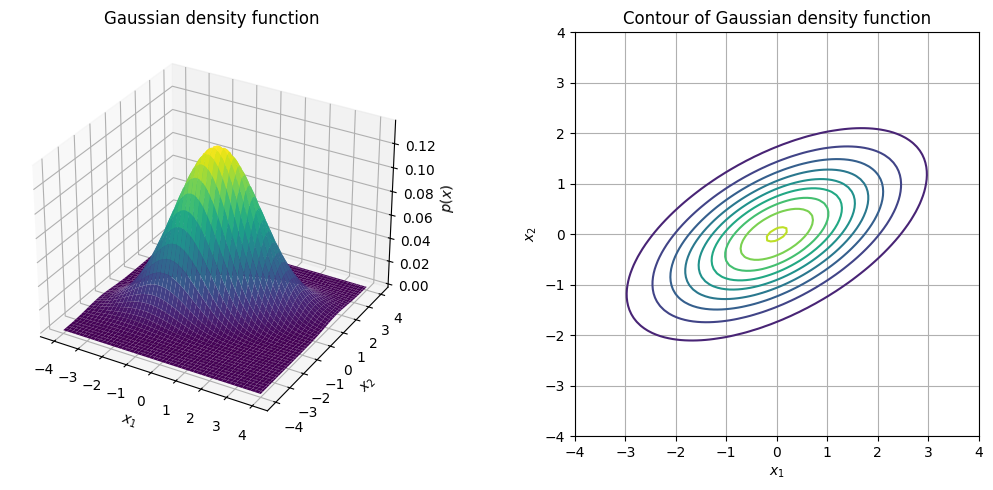

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import matplotlib.pyplot as plt

# Define the mean and covariance matrix
mean = np.array([0, 0])
cov = np.array([[2, 0.8], [0.8, 1]])
invcov = np.linalg.inv(cov)

# Create a meshgrid for plotting
x1 = np.linspace(-4, 4, 100)
x2 = np.linspace(-4, 4, 100)
X1, X2 = np.meshgrid(x1, x2)

# Calculate the Gaussian density function
def gaussian_density(x, mean, covariance):
    x_minus_mean = x - mean
    exponent = -0.5*np.dot(np.dot(x_minus_mean.T, invcov), x_minus_mean)
    coefficient = 1/((2*np.pi)**(len(mean)/2)*np.sqrt(np.linalg.det(cov)))
    return coefficient * np.exp(exponent)

Z = np.zeros((len(x1), len(x2)))
for i in range(len(x1)):
    for j in range(len(x2)):
        x = np.array([X1[i, j], X2[i, j]])
        Z[i, j] = gaussian_density(x, mean, cov)

# Create the figure and subplots
fig = plt.figure(figsize=(11, 5), dpi=100)
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

# Surface plot
ax1.plot_surface(X1, X2, Z, cmap=cm.viridis)
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_zlabel('$p(x)$')
ax1.set_title('Gaussian density function')

# Contour plot
contour = ax2.contour(X1, X2, Z, levels=10)
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_title('Contour of Gaussian density function')
ax2.axis('square')
ax2.grid()
fig.tight_layout()
plt.show()

<br>

The best estimate of a vector  $x = (x_1, x_2)$  in the absence of any information is typically  $\hat{x}_1 = 0$  and  $\hat{x}_2 = 0$.

Now, suppose we obtain partial information about  $x$  by measuring  $x_2 = -2$. Given this new information, should your estimate of  $x_1$  change? Yes, it should, because  The reasoning for this adjustment is explained below.

<br>

1) **Prior Belief**: Initially, without any information, the best estimate for $x_1$ and $x_2$ is their mean, which is 0 for both. This represents our prior belief about the values.

2) **New Evidence**: The measurement $x_2 = -2$ provides new evidence. This evidence suggests that $x_2$ is likely to be around -2, rather than 0.

3) **Conditional Probability**: We need to update our belief about $x_1$ given this new evidence. This is where conditional probability comes in. We want to find the probability distribution of $x_1$ given that $x_2 = -2$, denoted as $P(x_1 | x_2 = -2)$.

4) **Gaussian Properties**: Since the original distribution is Gaussian, the conditional distribution $P(x_1 | x_2 = -2)$ will also be Gaussian. This property makes the calculations easier.

5) **Shift in Estimate**: The conditional Gaussian distribution will have a new mean and variance. The new mean of $x_1$ will be shifted away from 0, influenced by the value of $x_2 = -2$. This shift occurs because $x_1$ and $x_2$ are correlated (covariance is 0.8 in this example).

6) **Intuition**: Intuitively, if $x_2$ is higher than expected, and $x_1$ and $x_2$ are positively correlated, we would expect $x_1$ to also be higher than initially expected.

<br>

More precisely, the conditional mean and the conditional covariance of $x_1$ given $x_2=y$ is given as follows:

\begin{aligned}
  \hat{x}_1 &= \mathbf{E}[x_1 \vert x_2=y] \\
          &= \Sigma_{12}\Sigma_{22}^{-1} y = -1.6 \\
  \hat{\Sigma}_1 &= \mathbf{cov}[x_1 \vert x_2=y] \\
         &= \Sigma_{11} - \Sigma_{12} \Sigma_{22}^{-1} \Sigma_{12}^T
         = 1.36
\end{aligned}

which is obtained from the conditional pdf of a jointly Gaussian random variables via Bayesian inference:

$$
\begin{aligned}
p(x_1|x_2) &= \frac{p(x_2|x_1)p(x_1)}{p(x_2)} = \frac{p(x)}{p(x_2)} \\
&= \frac{1}{ (2\pi)^{n/2}
\left| \Sigma_{11}- \Sigma_{12} \Sigma_{22}^{-1} \Sigma_{12}^T \right|^{1/2} }
e^{
-\frac{1}{2}
\left( x_1-\Sigma_{12} \Sigma_{22}^{-1}x_2 \right)^T
\left( \Sigma_{11}- \Sigma_{12} \Sigma_{22}^{-1} \Sigma_{12}^T\right)^{-1}
\left( x_1-\Sigma_{12} \Sigma_{22}^{-1}x_2 \right)
}
\end{aligned}
$$

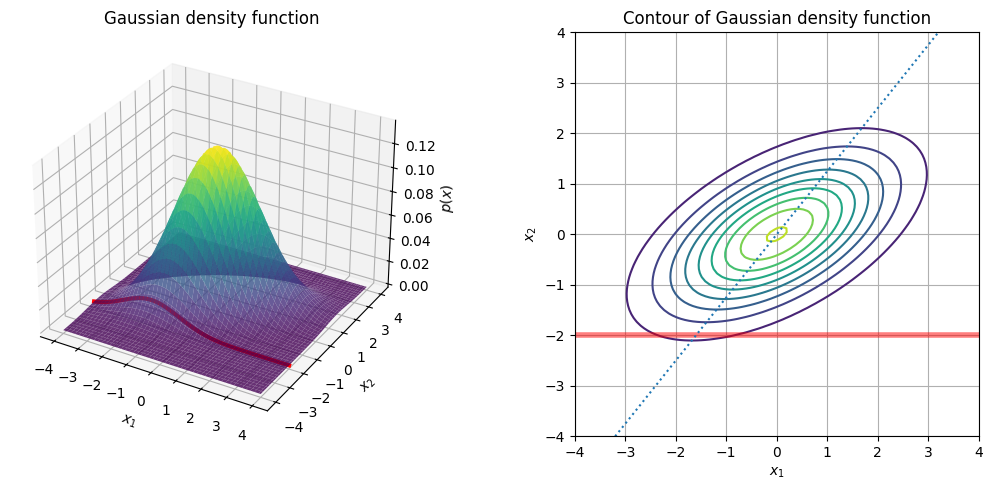

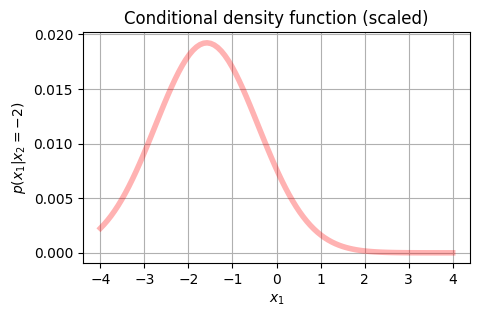

In [10]:
fig = plt.figure(figsize=(11, 5), dpi=100)
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

# Surface plot
ax1.plot_surface(X1, X2, Z, cmap=cm.viridis, alpha=0.8)
ax1.plot(X1[25,:], X2[25,:], Z[25,:], color='red', linewidth=3, alpha=1)
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_zlabel('$p(x)$')
ax1.set_title('Gaussian density function')

# Contour plot
contour = ax2.contour(X1, X2, Z, levels=10)
ax2.axhline(-2, color='red', linewidth=4, alpha=0.5)
ax2.plot(x2*0.8, x2, ':') #x2가 -2일때 peak의 위치 -> 각 peak의 선을 이은선 가우시안이면 이론적으로 선형관계인값네?
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_title('Contour of Gaussian density function')
ax2.axis('square')
ax2.grid()
fig.tight_layout()
plt.show()

# Conditional pdf plot
plt.figure(figsize=(5, 3), dpi=100)
plt.plot(X1[25,:], Z[25,:], color='red', linewidth=4, alpha=0.3)
plt.xlabel('$x_1$')
plt.ylabel('$p(x_1|x_2=-2)$')
plt.title('Conditional density function (scaled)')
plt.grid()
plt.show()

<br>

---

<br>

<div style="text-align: right">
Contents partially taken from https://en.wikipedia.org/wiki/Bayesian_inference and http://web.stanford.edu/class/cs109.
</div>



